Import statements from Matt

In [2]:
import astropy
from astropy.io import fits
import numpy as np 
import textwrap
import matplotlib.pyplot as plt
import os, sys 
import importlib
import glob
from tqdm import tqdm


from astropy.time import Time
from astropy.units import allclose as quantity_allclose
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates.builtin_frames import FK5, ICRS, GCRS, GeocentricMeanEcliptic, BarycentricMeanEcliptic, HeliocentricMeanEcliptic, GeocentricTrueEcliptic, BarycentricTrueEcliptic, HeliocentricTrueEcliptic, HeliocentricEclipticIAU76
from astropy.constants import R_sun, R_earth
from astropy.wcs import WCS

import fitsio


# -------------------------------------------------------------------------------------
# Local imports
# -------------------------------------------------------------------------------------
sys.path.append(os.path.join(os.path.split(os.getcwd())[0], 'shifty'))
import known
import downloader

importlib.reload(known)
importlib.reload(downloader)


<module 'downloader' from '/arc/home/mikea/Github/shifty/shifty/downloader.py'>

In [3]:
import astropy 
astropy.__version__ , astropy.__path__

('5.1', ['/opt/conda/lib/python3.9/site-packages/astropy'])

In [4]:
# Some notes on which camera/ccd/etc we expect Sedna to be in 
# - These came from inputing 57.136 7.6549 into lightkurve's tess-cut/tess-search function 
camera = 1 
ccd = 4
col, row = 1550, 1101

In [5]:
importlib.reload(known)
K = known.Known()

# These are the values from JPL at hourly intervals
JD_, RA_, Dec_  = K._radec_for_sedna()
for t,r,d in zip(JD_[:2], RA_[:2], Dec_[:2]):
    print(t,r,d)
print()

# Plot the positions across the course of the November 2019 (Sector-5) period  
RA_, Dec_ = K._interpolate_radec_for_sedna(JD_)
#plt.plot(JD_, RA_ , '.')
#plt.plot(JD_, Dec_ , '.')

2458436.5 57.136303009 7.65500855
2458436.541666667 57.135914678 7.65489896



In [6]:
# Local imports
sys.path.append(os.path.join(os.path.split(os.getcwd())[0], 'shifty'))
import imagehandler
importlib.reload(imagehandler)
import glob
filenames=sorted(glob.glob('/arc/home/mikea/.shifty_data/tess/5/1/4/tess20183??????*.fits'))[0::1]
print(f"{len(filenames)} files")
#print(' '.join(filenames))

1108 files


In [7]:
import importlib
importlib.reload(imagehandler)
D=imagehandler.DataHandler(filenames, extno=1, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                           MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False
                           , xycuts=[1000, 1250, 1400, 1700])

Set MJD-END to 58437.984499 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58438.005333 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58438.026167 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58438.047000 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58438.067834 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58438.088668 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58438.109501 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58438.130335 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58438.151168 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58438.172002 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58438.192836 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58438.213669 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58438.234503 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58438.255337 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58438.276170 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58438.297004 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58438.317837 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58438.338671 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58438.359505 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58438.380338 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58438.401172 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58438.422005 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58438.442839 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58438.463673 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58438.484506 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58438.505340 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58438.526173 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58438.547007 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58438.567841 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58438.588674 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58438.609508 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58438.630341 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58438.651175 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58438.672009 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58438.692842 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58438.713676 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58438.734509 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58438.755343 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58438.776176 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58438.797010 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58438.817844 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58438.838677 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58438.859511 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58438.880344 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58438.901178 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58438.922011 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58438.942845 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58438.963679 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58438.984512 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58439.005346 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58439.026179 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58439.047013 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58439.067846 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58439.088680 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58439.109513 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58439.130347 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58439.151180 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58439.172014 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58439.192848 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58439.213681 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58439.234515 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58439.255348 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58439.276182 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58439.297015 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58439.317849 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58439.338682 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58439.359516 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58439.380349 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58439.401183 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58439.422016 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58439.442850 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58439.463683 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58439.484517 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58439.505350 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58439.526184 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58439.547018 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58439.567851 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58439.588685 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58439.609518 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58439.630352 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58439.651185 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58439.672019 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58439.692852 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58439.713686 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58439.734519 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58439.755353 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58439.776186 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58439.797020 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58439.817853 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58439.838687 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58439.859520 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58439.880354 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58439.901187 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58439.922021 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58439.942854 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58439.963688 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58439.984521 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58440.005355 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58440.026188 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58440.047021 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58440.067855 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58440.088688 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58440.109522 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58440.130355 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58440.151189 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58440.172022 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58440.192856 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58440.213689 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58440.234523 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58440.255356 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58440.276190 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58440.297023 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58440.317857 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58440.338690 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58440.359524 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58440.380357 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58440.401190 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58440.422024 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58440.442857 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58440.463691 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58440.484524 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58440.505358 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58440.526191 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58440.567858 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58440.588692 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58440.651192 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58440.692859 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58440.713692 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58440.734526 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58440.755359 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58440.797026 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58440.817859 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58440.838693 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58440.859526 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58440.880360 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58440.901193 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58440.922027 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58440.942860 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58440.963693 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58440.984527 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58441.005360 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58441.026194 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58441.047027 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58441.067861 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58441.088694 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58441.109527 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58441.130361 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58441.151194 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58441.172028 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58441.192861 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58441.213695 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58441.234528 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58441.255361 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58441.276195 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58441.297028 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58441.317862 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58441.338695 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58441.359528 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58441.380362 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58441.401195 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58441.422029 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58441.442862 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58441.463695 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58441.484529 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58441.505362 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58441.526196 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58441.547029 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58441.567862 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58441.588696 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58441.609529 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58441.630363 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58441.651196 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58441.672029 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58441.692863 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58441.713696 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58441.734530 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58441.755363 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58441.776196 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58441.797030 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58441.817863 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58441.838696 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58441.859530 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58441.880363 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58441.901197 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58441.922030 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58441.942863 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58441.963697 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58441.984530 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58442.005363 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58442.026197 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58442.047030 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58442.067864 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58442.088697 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58442.109530 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58442.130364 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58442.151197 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58442.172030 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58442.192864 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58442.213697 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58442.234530 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58442.255364 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58442.276197 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58442.297031 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58442.317864 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58442.338697 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58442.359531 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58442.380364 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58442.401197 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58442.422031 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58442.442864 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58442.463697 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58442.484531 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58442.505364 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58442.526197 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58442.547031 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58442.567864 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58442.588697 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58442.609531 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58442.630364 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58442.651197 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58442.672031 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58442.692864 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58442.713697 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58442.734531 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58442.755364 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58442.776197 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58442.797031 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58442.817864 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58442.838697 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58442.859531 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58442.880364 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58442.901197 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58442.922031 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58442.942864 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58442.963697 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58442.984531 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58443.005364 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58443.026197 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58443.047031 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58443.067864 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58443.088697 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58443.109531 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58443.130364 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58443.151197 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58443.172031 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58443.192864 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58443.213697 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58443.234531 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58443.255364 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58443.276197 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58443.297030 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58443.317864 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58443.338697 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58443.359530 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58443.380364 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58443.401197 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58443.422030 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58443.442864 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58443.463697 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58443.484530 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58443.505363 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58443.526197 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58443.588697 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58443.609530 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58443.630363 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58443.651196 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58443.672030 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58443.692863 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58443.713696 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58443.734530 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58443.755363 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58443.776196 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58443.797029 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58443.817863 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58443.838696 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58443.859529 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58443.880363 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58443.901196 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58443.922029 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58443.942862 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58443.963696 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58443.984529 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58444.005362 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58444.026196 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58444.047029 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58444.067862 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58444.088695 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58444.109529 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58444.130362 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58444.151195 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58444.172028 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58444.192862 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58444.213695 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58444.234528 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58444.255361 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58444.276195 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58444.297028 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58444.317861 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58444.338694 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58444.359528 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58444.380361 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58444.401194 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58444.422027 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58444.442861 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58444.463694 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58444.484527 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58444.505360 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58444.526194 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58444.547027 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58444.567860 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58444.588693 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58444.609527 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58444.630360 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58444.651193 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58444.672026 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58444.692860 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58444.713693 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58444.734526 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58444.755359 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58444.776193 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58444.797026 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58444.817859 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58444.838692 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58444.859526 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58444.880359 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58444.901192 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58444.922025 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58444.942858 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58444.963692 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58444.984525 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58445.005358 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58445.026191 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58445.047025 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58445.067858 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58445.088691 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58445.109524 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58445.130357 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58445.151191 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58445.172024 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58445.192857 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58445.213690 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58445.234524 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58445.255357 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58445.276190 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58445.297023 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58445.317856 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58445.338690 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58445.359523 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58445.380356 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58445.401189 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58445.422022 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58445.442856 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58445.463689 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58445.484522 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58445.505355 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58445.526188 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58445.547022 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58445.567855 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58445.588688 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58445.609521 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58445.630354 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58445.651188 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58445.672021 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58445.692854 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58445.713687 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58445.734520 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58445.755354 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58445.776187 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58445.797020 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58445.817853 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58445.838686 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58445.859520 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58445.880353 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58445.901186 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58445.922019 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58445.942852 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58445.963685 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58445.984519 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58446.005352 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58446.026185 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58446.047018 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58446.067851 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58446.088685 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58446.109518 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58446.130351 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58446.151184 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58446.172017 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58446.192850 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58446.213684 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58446.234517 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58446.255350 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58446.276183 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58446.297016 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58446.317849 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58446.338683 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58446.359516 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58446.380349 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58446.401182 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58446.422015 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58446.442848 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58446.463682 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58446.484515 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58446.505348 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58446.526181 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58446.567847 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58446.588680 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58446.609514 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58446.630347 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58446.651180 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58446.672013 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58446.692846 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58446.713679 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58446.734512 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58446.755346 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58446.776179 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58446.797012 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58446.817845 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58446.838678 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58446.859511 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58446.880344 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58446.901178 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58446.922011 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58446.942844 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58446.963677 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58446.984510 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58447.005343 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58447.026176 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58447.047010 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58447.067843 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58447.088676 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58447.109509 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58447.130342 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58447.151175 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58447.172008 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58447.192841 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58447.213675 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58447.234508 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58447.255341 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58447.276174 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58447.297007 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58447.317840 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58447.338673 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58447.359506 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58447.380340 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58447.401173 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58447.422006 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58447.442839 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58447.463672 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58447.484505 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58447.505338 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58447.526171 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58447.547004 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58447.567838 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58447.588671 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58447.609504 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58447.630337 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58447.651170 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58447.672003 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58447.692836 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58447.713669 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58447.734502 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58447.755336 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58447.776169 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58447.797002 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58447.817835 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58447.838668 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58447.859501 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58447.880334 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58447.901167 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58447.922000 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58447.942833 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58447.963666 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58447.984500 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58448.005333 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58448.026166 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58448.046999 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58448.067832 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58448.088665 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58448.109498 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58448.130331 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58448.151164 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58448.171997 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58448.192830 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58448.213664 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58448.234497 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58448.255330 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58448.276163 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58448.296996 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58448.317829 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58448.338662 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58448.359495 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58448.380328 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58448.401161 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58448.421994 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58448.442827 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58448.463661 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58448.484494 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58448.505327 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58448.526160 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58448.546993 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58448.567826 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58448.588659 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58448.609492 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58448.630325 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58448.651158 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58448.671991 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58448.692824 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58448.713657 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58448.734490 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58448.755323 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58448.776157 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58448.796990 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58448.817823 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58448.838656 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58448.859489 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58448.880322 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58448.901155 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58448.921988 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58448.942821 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58448.963654 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58448.984487 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58449.005320 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58449.026153 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58449.046986 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58449.067819 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58449.088652 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58449.109486 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58449.130319 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58449.151152 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58449.171985 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58449.192818 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58449.213651 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58449.234484 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58449.255317 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58449.276150 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58449.296983 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58449.317816 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58449.338649 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58449.359482 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58449.380315 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58449.401148 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58449.421981 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58449.442814 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58449.463648 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58449.484481 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58449.505314 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58449.526147 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58451.317798 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58451.338631 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58451.359464 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58451.380297 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58451.401131 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58451.421964 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58451.442797 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58451.463630 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58451.484463 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58451.505296 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58451.526129 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58451.546963 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58451.567796 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58451.588629 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58451.609462 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58451.630295 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58451.651128 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58451.671961 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58451.692795 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58451.713628 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58451.734461 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58451.755294 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58451.776127 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58451.796960 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58451.817793 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58451.838627 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58451.859460 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58451.880293 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58451.901126 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58451.921959 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58451.942792 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58451.963625 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58451.984458 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58452.005291 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58452.026125 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58452.046958 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58452.067791 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58452.088624 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58452.109457 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58452.130290 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58452.151123 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58452.171956 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58452.192789 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58452.213622 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58452.234456 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58452.255289 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58452.276122 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58452.296955 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58452.317788 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58452.338621 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58452.359454 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58452.380287 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58452.401120 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58452.421953 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58452.442786 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58452.463619 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58452.484453 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58452.505286 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58452.526119 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58452.546952 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58452.567785 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58452.588618 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58452.609451 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58452.630284 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58452.651117 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58452.671950 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58452.692783 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58452.713616 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58452.734449 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58452.755282 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58452.776115 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58452.796948 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58452.817781 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58452.838615 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58452.859448 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58452.880281 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58452.901114 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58452.921947 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58452.942780 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58452.963613 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58452.984446 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58453.005279 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58453.026112 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58453.046945 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58453.067778 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58453.088611 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58453.109444 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58453.130277 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58453.151110 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58453.171943 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58453.192776 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58453.213609 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58453.234442 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58453.255275 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58453.276108 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58453.296941 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58453.317774 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58453.338607 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58453.359440 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58453.380273 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58453.401106 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58453.421939 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58453.442772 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58453.463605 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58453.484438 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58453.505271 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58453.526104 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58453.546937 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58453.567770 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58453.588603 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58453.609436 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58453.630269 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58453.651102 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58453.671935 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58453.692768 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58453.713601 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58453.734434 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58453.755267 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58453.776100 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58453.796933 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58453.817766 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58453.838599 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58453.859432 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58453.880265 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58453.901098 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58453.921931 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58453.942764 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58453.963597 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58453.984430 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58454.005263 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58454.026096 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58454.046929 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58454.067762 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58454.088595 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58454.130261 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58454.151094 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58454.171927 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58454.192760 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58454.213593 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58454.234426 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58454.255258 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58454.276091 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58454.296924 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58454.317757 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58454.338590 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58454.359423 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58454.380256 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58454.401089 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58454.421922 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58454.442755 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58454.463588 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58454.484421 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58454.505254 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58454.526087 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58454.546920 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58454.567753 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58454.588586 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58454.609419 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58454.630252 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58454.651084 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58454.671917 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58454.692750 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58454.713583 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58454.734416 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58454.755249 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58454.776082 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58454.796915 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58454.817748 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58454.838581 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58454.859414 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58454.880247 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58454.901080 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58454.921913 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58454.942745 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58454.963578 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58454.984411 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58455.005244 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58455.026077 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58455.046910 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58455.067743 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58455.088576 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58455.109409 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58455.130242 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58455.151075 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58455.171908 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58455.192740 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58455.213573 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58455.234406 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58455.255239 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58455.276072 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58455.296905 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58455.317738 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58455.338571 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58455.359404 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58455.380237 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58455.401069 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58455.421902 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58455.442735 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58455.463568 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58455.484401 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58455.505234 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58455.526067 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58455.546900 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58455.567733 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58455.588565 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58455.609398 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58455.630231 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58455.651064 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58455.671897 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58455.692730 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58455.713563 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58455.734396 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58455.755229 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58455.776061 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58455.796894 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58455.817727 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58455.838560 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58455.859393 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58455.880226 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58455.901059 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58455.921892 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58455.942724 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58455.963557 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58455.984390 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58456.005223 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58456.026056 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58456.046889 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58456.067722 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58456.088554 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58456.109387 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58456.130220 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58456.151053 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58456.171886 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58456.192719 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58456.213552 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58456.234384 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58456.255217 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58456.276050 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58456.296883 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58456.317716 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58456.338549 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58456.359382 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58456.380214 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58456.401047 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58456.421880 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58456.442713 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58456.463546 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58456.484379 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58456.505212 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58456.526044 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58456.546877 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58456.567710 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58456.588543 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58456.609376 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58456.630209 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58456.651041 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58456.671874 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58456.692707 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58456.713540 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58456.734373 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58456.755206 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58456.776038 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58456.796871 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58456.817704 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58456.838537 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58456.859370 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58456.880203 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58456.901035 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58456.921868 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58456.942701 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58456.963534 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58456.984367 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58457.005199 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58457.026032 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58457.046865 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58457.067698 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58457.088531 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58457.130196 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58457.151029 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58457.171862 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58457.192695 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58457.213528 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58457.234360 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58457.255193 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58457.276026 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58457.296859 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58457.317692 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58457.338524 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58457.359357 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58457.380190 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58457.401023 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58457.421856 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58457.442688 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58457.463521 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58457.484354 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58457.505187 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58457.526020 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58457.546852 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58457.567685 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58457.588518 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58457.609351 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58457.630184 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58457.651016 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58457.671849 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58457.692682 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58457.713515 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58457.734347 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58457.755180 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58457.776013 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58457.796846 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58457.817679 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58457.838511 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58457.859344 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58457.880177 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58457.901010 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58457.921842 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58457.942675 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58457.963508 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58457.984341 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58458.005174 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58458.026006 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58458.046839 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58458.067672 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58458.088505 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58458.109337 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58458.130170 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58458.151003 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58458.171836 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58458.192668 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58458.213501 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58458.234334 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58458.255167 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58458.276000 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58458.296832 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58458.317665 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58458.338498 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58458.359331 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58458.380163 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58458.400996 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58458.421829 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58458.442662 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58458.463494 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58458.484327 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58458.505160 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58458.525993 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58458.546825 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58458.567658 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58458.588491 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58458.609324 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58458.630156 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58458.650989 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58458.671822 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58458.692654 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58458.713487 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58458.734320 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58458.755153 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58458.775985 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58458.796818 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58458.817651 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58458.838484 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58458.859316 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58458.880149 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58458.900982 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58458.921815 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58458.942647 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58458.963480 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58458.984313 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58459.005145 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58459.025978 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58459.046811 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58459.067644 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58459.088476 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58459.109309 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58459.130142 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58459.150975 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58459.171807 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58459.192640 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58459.213473 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58459.234305 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58459.255138 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58459.275971 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58459.296804 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58459.317636 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58459.338469 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58459.359302 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58459.380134 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58459.400967 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58459.421800 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58459.442633 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58459.463465 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58459.484298 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58459.505131 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58459.525963 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58459.546796 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58459.567629 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58459.588461 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58459.609294 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58459.630127 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58459.650960 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58459.671792 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58459.692625 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58459.713458 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58459.734290 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58459.755123 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58459.775956 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58459.796788 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58459.817621 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58459.838454 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58459.859286 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58459.880119 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58459.900952 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58459.921784 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58459.942617 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58459.963450 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58459.984283 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58460.005115 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58460.025948 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58460.046781 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58460.067613 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58460.088446 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58460.130111 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58460.150944 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58460.171777 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58460.192609 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58460.213442 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58460.234275 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58460.255107 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58460.275940 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58460.296773 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58460.317605 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58460.338438 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58460.359271 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58460.380103 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58460.400936 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58460.421769 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58460.442601 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58460.463434 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58460.484267 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58460.505099 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58460.525932 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58460.546765 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58460.567597 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58460.588430 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58460.609263 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58460.630095 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58460.650928 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58460.671761 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58460.692593 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58460.713426 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58460.734258 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58460.755091 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58460.775924 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58460.796756 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58460.817589 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58460.838422 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58460.859254 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58460.880087 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58460.900920 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58460.921752 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58460.942585 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58460.963418 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58460.984250 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58461.005083 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58461.025915 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58461.046748 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58461.067581 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58461.088413 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58461.109246 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58461.130079 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58461.150911 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58461.171744 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58461.192577 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58461.213409 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58461.234242 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58461.255074 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58461.275907 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58461.296740 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58461.317572 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58461.338405 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58461.359238 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58461.380070 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58461.400903 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58461.421735 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58461.442568 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58461.463401 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58461.484233 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58461.505066 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58461.525899 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58461.546731 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58461.567564 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58461.588396 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58461.609229 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58461.630062 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58461.650894 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58461.671727 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58461.692559 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58461.713392 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58461.734225 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58461.755057 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58461.775890 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58461.796722 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58461.817555 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58461.838388 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58461.859220 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58461.880053 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58461.900885 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58461.921718 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58461.942551 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58461.963383 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58461.984216 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58462.005048 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58462.025881 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58462.046714 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58462.067546 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58462.088379 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58462.109211 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58462.130044 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58462.150877 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58462.171709 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58462.192542 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58462.213374 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58462.234207 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58462.255040 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58462.275872 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58462.296705 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58462.317537 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58462.338370 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58462.359203 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58462.380035 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58462.400868 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58462.421700 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58462.442533 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58462.463365 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58462.484198 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58462.505031 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58462.525863 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58462.546696 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58462.567528 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58462.588361 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58462.609194 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58462.630026 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58462.650859 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58462.671691 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58462.692524 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58462.713356 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58462.734189 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58462.755022 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58462.775854 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58462.796687 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58462.817519 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58462.838352 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58462.859185 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58462.880017 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58462.900850 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58462.921682 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58462.942515 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58462.963347 from DATE-END'. [astropy.wcs.wcs]


Set MJD-END to 58462.984180 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58463.005013 from DATE-END'. [astropy.wcs.wcs]


Reading image 1107: /arc/home/mikea/.shifty_data/tess/5/1/4/tess2018345002937-s0005-1-4-0125-s_ffic.fits
Read 1108 files!


Set MJD-END to 58463.025845 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58463.046678 from DATE-END'. [astropy.wcs.wcs]


In [8]:
times=[]
raw_flux=[]
times_tess=[]
for i, d in enumerate(D.image_data.header):
    raw_flux.append(np.nanmedian(D.image_data.data[i]))
    times.append(d['SHIFTY_MJD_MID'])
    times_tess.append(d['TSTART'])
    if d['DQUALITY']!=0:
        print(i, d['DQUALITY'])

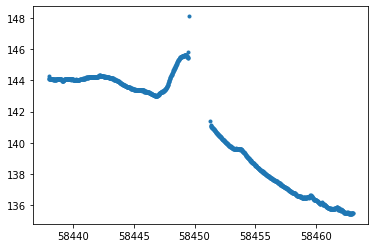

In [10]:
plt.plot(times, raw_flux, '.')

In [11]:
def get_sedna_shifts(tvals):
    x, y = [], []
    ralist, declist = [], []
    times = []
    for i in range(len(tvals)):
        jd = 2457000 + tvals[i]
        ra, dec = known.Known()._interpolate_radec_for_sedna(jd)
        crd = SkyCoord(ra, dec, unit='deg')
        #pixel = WCS(hdr).world_to_pixel(crd)
        #x.append(int(pixel[0]))
        #y.append(int(pixel[1]))
        ralist.append(ra)
        declist.append(dec)
        times.append(jd)
    return np.array(tuple(zip(x, y))), np.array(tuple(zip(ralist, declist))), times

def get_101_shifts(tvals):
    x, y = [], []
    ralist, declist = [], []
    times = []
    for i in range(len(tvals)):
        jd = 2457000 + tvals[i]
        ra, dec = known.Known()._interpolate_radec_for_101583(jd)
        crd = SkyCoord(ra, dec, unit='deg')
        #pixel = WCS(hdr).world_to_pixel(crd)
        #x.append(int(pixel[0]))
        #y.append(int(pixel[1]))
        ralist.append(ra)
        declist.append(dec)
        times.append(jd)
    return np.array(tuple(zip(x, y))), np.array(tuple(zip(ralist, declist))), times

let's get predicted RA and Dec for Sedna at each cadence

In [12]:
_, locs, t_vals = get_sedna_shifts(times_tess)

In [13]:
locs[300]

array([57.05143316,  7.63595899])

In [14]:
from tqdm import tnrange

And then we'll use WCS tools to convert these coordinates at each cadence to a pixel position at each cadence.

In [15]:
x, y = [], []

for j, W in enumerate(D.image_data.WCS):
    ra = locs[j, 0]
    dec = locs[j, 1]
    outColPix, outRowPix = W.all_world2pix(ra, dec, 0)
    x.append(outColPix)
    y.append(outRowPix)
    

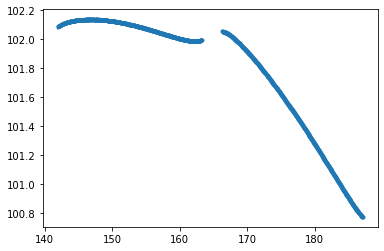

In [16]:
plt.plot(x,y, '.')

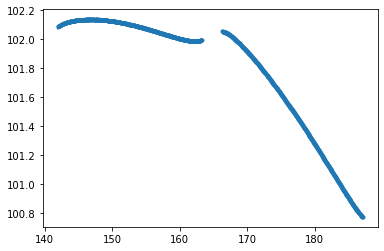

In [17]:
plt.plot(x,y, '.') # Old

In [18]:
from astropy.io import fits

And then let's use it. At each cadence, draw a 27x27 region from the postcard centered on the expected position of Sedna. We'll subtract off the median of the 100 cadences on either side of the postcard frame to use as a median model of what the stars are doing. Then stack up these shifted frames. For coding convenience/laziness I'm only selecting the region when this entire TPF would fall onto the postcard, and excluding the first and last 100 frames for median calculations, but there's no reason we couldn't do both of those more properly.

We could also pre-compute the median frames and do that calculation much more quickly than I'm doing it here.

It would also be good to split up the two orbits, right now the last 100 frames of the first orbit include median information from the first 100 cadences of the second orbit, where we know the pointing is different.

In [19]:
size = len(D.image_data.data)
runmed = np.zeros(D.image_data.data.shape)
output = np.zeros((size, 53, 53))

for i in tnrange(100, size-100):

    a1 = int(np.round((x[i]), 0))  # What is the +148/2 about?
    a2 = int(np.round((y[i]), 0))   # What is the +104/2 about?
    #print(a1, a2)
    
    if ((a1 > 27) and (a2 > 27)):  
        #print(i)
        runmed[i] = np.nanmedian(D.image_data.data[i-100:i+100], axis=(0))
        medsub = D.image_data.data[i] - runmed[i]

        #plt.clf()
        #plt.imshow(medsub, vmin=-1, vmax=1, origin='lower')
        #plt.plot(a1,a2, 'rx', alpha=0.9, markersize=16)
        #print(a1, a2)
        #plt.savefig('frames/%04i.png'%i)
        output[i] = medsub[a2-26:a2+27, a1-26:a1+27]
        #output[i] = medsub
        #output[i] = a[2].data[q][i,a2-26:a2+27, a1-26:a1+27] 
        #bkgput[i] = bkg_[1].data[q][i,a1-26:a1+27, a2-26:a2+27]

/tmp/ipykernel_843/474936889.py:5: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(100, size-100):


  0%|          | 0/908 [00:00<?, ?it/s]

In [20]:
print(' data shape ', D.image_data.data.shape)
print(' output shape ', output.shape)
print(' runmed shape ', runmed.shape)
print( ' output-sum ' ,np.sum(output))
print( ' runmed-sum ' ,np.sum(runmed))


 data shape  (1108, 250, 300)
 output shape  (1108, 53, 53)
 runmed shape  (1108, 250, 300)
 output-sum  278175.14193725586
 runmed-sum  13553134392.376923


Do we see Sedna?

flux1 shape  (275, 53, 53)
  flux1 min, max  -71.050048828125 85.4345703125
   flux1 sum  275347.8713684082
outvar1    shape  (53, 53)
outvar1 min, max  -5.847707186612216 7.7277834805575285
 outvar1 sum  1001.2649867942116


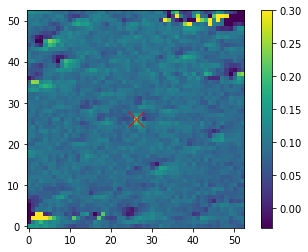

In [47]:
flux0 = output[0:275] #- bkgput[150:500] +0.0 #+ bkgput[50:500]
outvar0 = np.nanmean(flux0, axis=(0))

flux1 = output[275:550] #- bkgput[150:500] +0.0 #+ bkgput[50:500]
outvar1 = np.nanmean(flux1, axis=(0))

flux2 = output[550:825] #- bkgput[800:1100] +0.0 #+ bkgput[700:1100]
outvar2 = np.nanmean(flux2, axis=(0))

flux3 = output[825:1100] #- bkgput[800:1100] +0.0 #+ bkgput[700:1100]
outvar3 = np.nanmean(flux3, axis=(0))

#outvar = outvar1 + outvar2

outvar = np.nanmean(output, axis=(0))


plt.imshow(outvar, vmin=-0.03, vmax=0.3, origin='lower')

plt.plot(26,26, 'rx', alpha=0.9, markersize=16)

plt.colorbar()

print('flux1 shape ',      flux1.shape)
print('  flux1 min, max ', np.min(flux1) , np.max(flux1))
print('   flux1 sum ',      np.sum(flux1) )
print('outvar1    shape ', outvar1.shape)
print('outvar1 min, max ', np.min(outvar1) , np.max(outvar1))
print(' outvar1 sum ',      np.sum(outvar1) )


Oh shit we do! And it's not a systematic like a cosmic ray, if we chunk the first and second half of the data we see it in each.

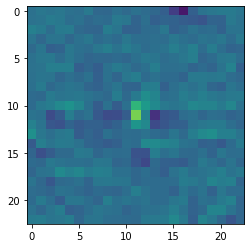

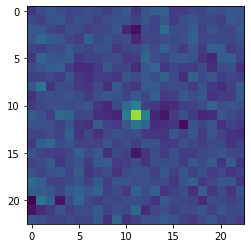

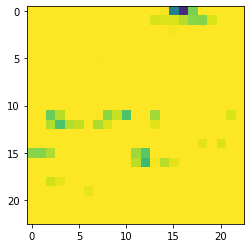

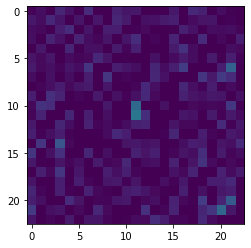

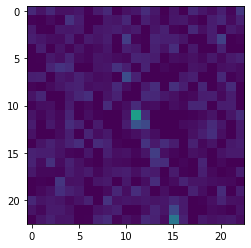

In [48]:
plt.imshow(outvar[15:38,15:38], vmin=-0.03, vmax=0.3)
plt.show()
plt.imshow(outvar0[15:38,15:38], vmin=-0.03, vmax=0.3)
plt.show()
plt.imshow(outvar1[15:38,15:38], vmin=-0.03, vmax=0.3)
plt.show()
plt.imshow(outvar2[15:38,15:38], vmin=-0.03, vmax=0.3)
plt.show()
plt.imshow(outvar3[15:38,15:38], vmin=-0.03, vmax=0.3)
plt.show()

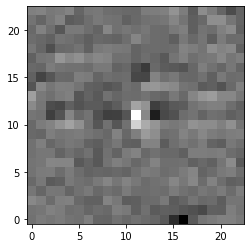

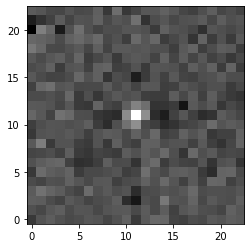

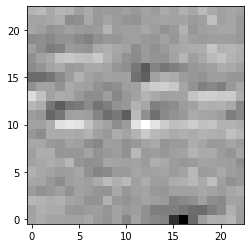

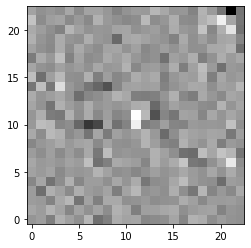

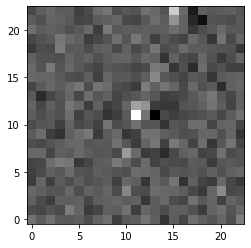

In [49]:
from matplotlib.colors import LogNorm
plt.imshow(outvar[15:38,15:38]+1, origin='lower', cmap='gray',norm=LogNorm())
plt.show()
plt.imshow(outvar0[15:38,15:38]+1, origin='lower', cmap='gray',norm=LogNorm())
plt.show()
plt.imshow(outvar1[15:38,15:38]+1, origin='lower', cmap='gray',norm=LogNorm())
plt.show()
plt.imshow(outvar2[15:38,15:38]+1, origin='lower', cmap='gray',norm=LogNorm())
plt.show()
plt.imshow(outvar3[15:38,15:38]+1, origin='lower', cmap='gray',norm=LogNorm())
plt.show()

In [55]:
counts_above_background = (outvar-np.median(outvar3))
peak_count = np.max(counts_above_background[20:-20,20:-20])
noise = np.std(counts_above_background[10:-10,10:-10])
sigma = peak_count / noise
#display(Markdown(fr'Peak count $\pm$ noise = {peak_count:4.1f} $\pm$ {noise:4.1f} ({sigma:4.1f}$\sigma$)'))
print(fr'Peak count $\pm$ noise = {peak_count:4.1f} $\pm$ {noise:4.1f} ({sigma:4.1f}$\sigma$)')

Peak count $\pm$ noise =  0.2 $\pm$  0.0 (14.0$\sigma$)


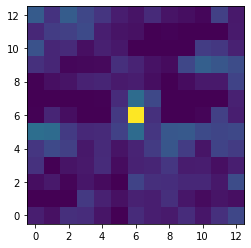

In [38]:
plt.imshow(counts_above_background[20:-20,20:-20], vmin=-0.03, vmax=0.3, origin='lower')
plt.show()